<a href="https://colab.research.google.com/github/Pierre-Louis245/Image-understanding-project/blob/main/Image_understanding_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/drive/My Drive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d msambare/fer2013


cp: cannot stat '/content/drive/My': No such file or directory
cp: cannot stat 'Drive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 96% 58.0M/60.3M [00:03<00:00, 24.2MB/s]
100% 60.3M/60.3M [00:03<00:00, 16.9MB/s]


In [3]:
!unzip fer2013.zip -d fer2013/


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: fer2013/train/sad/Training_65242339.jpg  
  inflating: fer2013/train/sad/Training_65267116.jpg  
  inflating: fer2013/train/sad/Training_65275626.jpg  
  inflating: fer2013/train/sad/Training_6529266.jpg  
  inflating: fer2013/train/sad/Training_65329617.jpg  
  inflating: fer2013/train/sad/Training_65338712.jpg  
  inflating: fer2013/train/sad/Training_65338797.jpg  
  inflating: fer2013/train/sad/Training_65387162.jpg  
  inflating: fer2013/train/sad/Training_65404494.jpg  
  inflating: fer2013/train/sad/Training_65426218.jpg  
  inflating: fer2013/train/sad/Training_65430136.jpg  
  inflating: fer2013/train/sad/Training_65437377.jpg  
  inflating: fer2013/train/sad/Training_6545735.jpg  
  inflating: fer2013/train/sad/Training_65463385.jpg  
  inflating: fer2013/train/sad/Training_65473985.jpg  
  inflating: fer2013/train/sad/Training_65502829.jpg  
  inflating: fer2013/train/sad/Training_6550

In [4]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Charger le fichier CSV FER-2013
dataset_path = "/content/fer2013/fer2013.csv"  # Chemin du fichier CSV
data = pd.read_csv(dataset_path)

# Vérifier les colonnes disponibles
print(data.head())

# Séparer les données et les labels
pixels = data['pixels'].tolist()
emotions = data['emotion'].tolist()

# Mapper les émotions à leurs noms
emotion_dict = {
    0: 'Anger', 1: 'Disgust', 2: 'Fear',
    3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'
}

# Exemple : afficher une image et son émotion
def display_image(index):
    pixel_sequence = np.array(pixels[index].split(), dtype='float32')
    image = pixel_sequence.reshape(48, 48)  # Images FER-2013 de 48x48 pixels
    plt.imshow(image, cmap='gray')
    plt.title(f"Emotion: {emotion_dict[emotions[index]]}")
    plt.axis('off')
    plt.show()

# Afficher une image de l'ensemble de données
display_image(0)


FileNotFoundError: [Errno 2] No such file or directory: '/content/fer2013/fer2013.csv'

In [5]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/drive/My Drive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Téléchargez le dataset depuis Kaggle
!kaggle datasets download -d msambare/fer2013

# Décompressez le fichier ZIP
!unzip -q fer2013.zip -d /content/fer2013/


mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat '/content/drive/My': No such file or directory
cp: cannot stat 'Drive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)
replace /content/fer2013/test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
!ls /content/fer2013/


test  train


In [7]:
!ls /content/fer2013/train/
!ls /content/fer2013/test/


angry  disgust	fear  happy  neutral  sad  surprise
angry  disgust	fear  happy  neutral  sad  surprise


In [8]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Définir les chemins des datasets
train_dir = "/content/fer2013/train/"
test_dir = "/content/fer2013/test/"

# Mapper les émotions à leurs noms
emotion_dict = {
    0: 'Anger', 1: 'Disgust', 2: 'Fear',
    3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'
}

# Fonction pour charger et prétraiter les images
def load_data_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):  # Parcourir les dossiers d'émotions
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):  # Parcourir les images
                file_path = os.path.join(label_path, file)
                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    # Redimensionner à 64x64 et normaliser
                    image = cv2.resize(image, (64, 64))
                    images.append(image)
                    labels.append(int(label))
    return np.array(images), np.array(labels)

# Charger les données
X_train, y_train = load_data_from_directory(train_dir)
X_test, y_test = load_data_from_directory(test_dir)

# Ajouter une dimension pour les canaux (nécessaire pour certains frameworks)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Normaliser les pixels
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir les labels en one-hot encoding (facultatif, selon le modèle)
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


ValueError: invalid literal for int() with base 10: 'surprise'

In [9]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Définir les chemins des datasets
train_dir = "/content/fer2013/train/"
test_dir = "/content/fer2013/test/"

# Mapper les émotions aux indices (inversion de emotion_dict)
emotion_to_index = {
    'anger': 0, 'disgust': 1, 'fear': 2,
    'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6
}

# Fonction pour charger et prétraiter les images
def load_data_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):  # Parcourir les dossiers d'émotions
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):  # Parcourir les images
                file_path = os.path.join(label_path, file)
                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    # Redimensionner à 64x64 et normaliser
                    image = cv2.resize(image, (64, 64))
                    images.append(image)
                    # Convertir le label en entier grâce au mapping
                    labels.append(emotion_to_index[label.lower()])
    return np.array(images), np.array(labels)

# Charger les données
X_train, y_train = load_data_from_directory(train_dir)
X_test, y_test = load_data_from_directory(test_dir)

# Ajouter une dimension pour les canaux (nécessaire pour certains frameworks)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Normaliser les pixels
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir les labels en one-hot encoding (facultatif, selon le modèle)
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


KeyError: 'angry'

In [10]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Définir les chemins des datasets
train_dir = "/content/fer2013/train/"
test_dir = "/content/fer2013/test/"

# Dictionnaire adapté aux noms des dossiers
emotion_to_index = {
    'angry': 0, 'disgust': 1, 'fear': 2,
    'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6
}

# Fonction pour charger et prétraiter les images
def load_data_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):  # Parcourir les dossiers d'émotions
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):  # Parcourir les images
                file_path = os.path.join(label_path, file)
                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    # Redimensionner à 64x64 et normaliser
                    image = cv2.resize(image, (64, 64))
                    images.append(image)
                    # Convertir le label en entier grâce au mapping
                    labels.append(emotion_to_index[label])
    return np.array(images), np.array(labels)

# Charger les données
X_train, y_train = load_data_from_directory(train_dir)
X_test, y_test = load_data_from_directory(test_dir)

# Ajouter une dimension pour les canaux (nécessaire pour certains frameworks)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Normaliser les pixels
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir les labels en one-hot encoding (facultatif, selon le modèle)
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (28709, 64, 64, 1), y_train shape: (28709, 7)
X_test shape: (7178, 64, 64, 1), y_test shape: (7178, 7)


In [11]:
print("Exemple de label :")
print("Label (numérique) :", y_train[0])
print("Label (one-hot) :", y_train[0])


Exemple de label :
Label (numérique) : [0. 0. 0. 0. 0. 1. 0.]
Label (one-hot) : [0. 0. 0. 0. 0. 1. 0.]


In [12]:
import os

# Créer les répertoires pour YOLO
os.makedirs("yolo_dataset/train/images", exist_ok=True)
os.makedirs("yolo_dataset/train/labels", exist_ok=True)
os.makedirs("yolo_dataset/test/images", exist_ok=True)
os.makedirs("yolo_dataset/test/labels", exist_ok=True)

# Fonction pour sauvegarder les images et annotations
def save_yolo_dataset(images, labels, split):
    for idx, (image, label) in enumerate(zip(images, labels)):
        # Sauvegarder l'image
        image_path = f"yolo_dataset/{split}/images/{idx}.jpg"
        cv2.imwrite(image_path, (image.squeeze() * 255).astype('uint8'))  # Convertir les pixels en uint8

        # Générer l'annotation YOLO (boîte couvrant toute l'image)
        annotation = f"{np.argmax(label)} 0.5 0.5 1.0 1.0\n"

        # Sauvegarder l'annotation
        label_path = f"yolo_dataset/{split}/labels/{idx}.txt"
        with open(label_path, "w") as f:
            f.write(annotation)

# Sauvegarder les données pour l'entraînement et le test
save_yolo_dataset(X_train, y_train, "train")
save_yolo_dataset(X_test, y_test, "test")

print("Les données YOLO sont prêtes !")


Les données YOLO sont prêtes !


In [13]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 53.0 MB/s eta 0:00:00


In [15]:
train: /content/yolo_dataset/train/images
val: /content/yolo_dataset/test/images

nc: 7  # Nombre de classes (émotions)
names: ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']


SyntaxError: invalid syntax (<ipython-input-15-16d94ebce183>, line 1)

In [16]:
# Contenu du fichier data.yaml
yaml_content = """
train: /content/yolo_dataset/train/images
val: /content/yolo_dataset/test/images

nc: 7  # Nombre de classes (émotions)
names: ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
"""

# Écrire le contenu dans un fichier data.yaml
with open("/content/data.yaml", "w") as yaml_file:
    yaml_file.write(yaml_content)

print("Fichier data.yaml créé avec succès !")


Fichier data.yaml créé avec succès !


In [17]:
!cat /content/data.yaml



train: /content/yolo_dataset/train/images
val: /content/yolo_dataset/test/images

nc: 7  # Nombre de classes (émotions)
names: ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']


In [18]:
from ultralytics import YOLO

# Charger le modèle YOLO pré-entraîné
model = YOLO("yolov8n.pt")

# Entraîner le modèle
model.train(data="/content/data.yaml", epochs=10, imgsz=64)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 181MB/s]


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 92.9MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 330MB/s]


AMP: checks passed ✅


train: Scanning /content/yolo_dataset/train/labels... 28709 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28709/28709 [00:16<00:00, 1724.62it/s]


train: New cache created: /content/yolo_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/yolo_dataset/test/labels... 7178 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7178/7178 [00:03<00:00, 1844.97it/s]


val: New cache created: /content/yolo_dataset/test/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.191G       0.27      1.899     0.9691          5         64: 100%|██████████| 1795/1795 [03:20<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:35<00:00,  6.35it/s]


                   all       7178       7178      0.374      0.346      0.266      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      0.17G     0.1618      1.235     0.9226          5         64: 100%|██████████| 1795/1795 [03:12<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:37<00:00,  5.95it/s]


                   all       7178       7178      0.434      0.393      0.329      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      0.17G     0.1437      1.156      0.918          5         64: 100%|██████████| 1795/1795 [03:09<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:33<00:00,  6.80it/s]


                   all       7178       7178      0.366      0.493       0.32      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.164G      0.127      1.102     0.9159          5         64: 100%|██████████| 1795/1795 [03:03<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:34<00:00,  6.59it/s]


                   all       7178       7178      0.437      0.432      0.367       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.164G      0.117      1.062     0.9122          5         64: 100%|██████████| 1795/1795 [03:05<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:33<00:00,  6.65it/s]


                   all       7178       7178      0.614      0.326      0.356      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.164G     0.1081      1.032      0.912          5         64: 100%|██████████| 1795/1795 [03:11<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:33<00:00,  6.77it/s]


                   all       7178       7178      0.425      0.442      0.349      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.166G    0.09962      1.005     0.9107          5         64: 100%|██████████| 1795/1795 [03:02<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:35<00:00,  6.31it/s]


                   all       7178       7178      0.403      0.449      0.363      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.161G    0.09421     0.9811     0.9089          5         64: 100%|██████████| 1795/1795 [03:05<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:33<00:00,  6.73it/s]


                   all       7178       7178      0.515      0.374      0.379      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.161G    0.08887     0.9571     0.9082          5         64: 100%|██████████| 1795/1795 [03:04<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:33<00:00,  6.69it/s]


                   all       7178       7178      0.527       0.36      0.386       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.161G    0.08187     0.9304     0.9079          5         64: 100%|██████████| 1795/1795 [03:04<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:32<00:00,  6.90it/s]


                   all       7178       7178      0.519      0.362      0.375      0.234

10 epochs completed in 0.622 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:36<00:00,  6.20it/s]


                   all       7178       7178      0.515      0.374      0.379      0.254
                 angry        958        958      0.459      0.343      0.355      0.269
               disgust        111        111          1          0      0.161      0.119
                  fear       1024       1024      0.579     0.0349      0.193      0.102
                 happy       1774       1774      0.187       0.87      0.634      0.338
                   sad       1247       1247      0.315      0.418      0.298      0.165
              surprise        831        831      0.439      0.642      0.571      0.467
               neutral       1233       1233      0.629      0.311      0.442      0.318
Speed: 0.0ms preprocess, 0.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe7d51634f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [19]:
results = model.predict(source="/content/yolo_dataset/test/images/0.jpg", conf=0.25)

# Afficher les résultats
results.show()



image 1/1 /content/yolo_dataset/test/images/0.jpg: 64x64 1 fear, 1 surprise, 10.6ms
Speed: 0.5ms preprocess, 10.6ms inference, 2.4ms postprocess per image at shape (1, 3, 64, 64)


AttributeError: 'list' object has no attribute 'show'

In [20]:
# Charger le modèle YOLO entraîné
trained_model_path = "runs/detect/train/weights/best.pt"  # Chemin vers le modèle sauvegardé
model = YOLO(trained_model_path)

# Prédire sur une image
result = model.predict(source="/content/yolo_dataset/test/images/0.jpg", conf=0.25, save=True)

# Afficher les résultats
result.show()



image 1/1 /content/yolo_dataset/test/images/0.jpg: 64x64 1 fear, 1 surprise, 15.1ms
Speed: 0.4ms preprocess, 15.1ms inference, 3.3ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/detect/predict


AttributeError: 'list' object has no attribute 'show'


image 1/1 /content/yolo_dataset/test/images/0.jpg: 64x64 1 fear, 1 surprise, 9.2ms
Speed: 0.5ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/detect/predict2


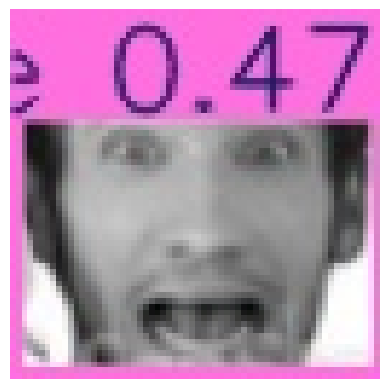

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

# Charger le modèle YOLO entraîné
trained_model_path = "runs/detect/train/weights/best.pt"  # Chemin vers le modèle sauvegardé
model = YOLO(trained_model_path)

# Prédire sur une image
results = model.predict(source="/content/yolo_dataset/test/images/0.jpg", conf=0.25, save=True)

# Afficher les résultats
for result in results:
    # Lire l'image sauvegardée
    output_image_path = "runs/detect/predict/0.jpg"  # Chemin de l'image prédite (changez selon votre image)
    image = Image.open(output_image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()


In [22]:
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/best.pt


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [23]:
!apt-get install -y locales
!locale-gen en_US.UTF-8
!update-locale LANG=en_US.UTF-8


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [24]:
!git add runs/detect/train/weights/best.pt
!git add notebook.ipynb  # Si vous avez un notebook


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [25]:
import shutil

# Copier le fichier en Python
shutil.copy("runs/detect/train/weights/best.pt", "/content/drive/MyDrive/best.pt")


'/content/drive/MyDrive/best.pt'

In [27]:
import shutil

# Copier le modèle dans Google Drive
shutil.copy("runs/detect/train/weights/best.pt", "/content/drive/MyDrive/Projet Image understanding/best.pt")


'/content/drive/MyDrive/Projet Image understanding/best.pt'

In [28]:
!git add runs/detect/train/weights/best.pt
!git add notebook.ipynb  # Si vous avez un notebook


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [29]:
!git commit -m "Ajout du modèle YOLO et du notebook"
!git remote add origin https://github.com/Pierre-Louis245/Image-understanding-project.git
!git push -u origin main


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968